<a href="https://colab.research.google.com/github/brunoricardodados/estudo-censo-2022/blob/main/estudo_censo2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Colab criado com sucesso!")


Colab criado com sucesso!


In [2]:
import pandas as pd

In [4]:
import zipfile
import os
import pandas as pd

nome_do_arquivo_zip = 'Tabelas_panorama.zip'
pasta_para_extrair = 'dados_do_ibge'

os.makedirs(pasta_para_extrair, exist_ok=True)

with zipfile.ZipFile(nome_do_arquivo_zip, 'r') as zip_ref:
    zip_ref.extractall(pasta_para_extrair)

print(f"Arquivos extraídos para a pasta: {pasta_para_extrair}")

nome_do_csv_dentro_do_zip = 'Censo 2022 - População por sexo - Brasil.csv'

caminho_completo_do_csv = os.path.join(pasta_para_extrair, nome_do_csv_dentro_do_zip)

df = pd.read_csv(caminho_completo_do_csv)

print("\nPrimeiras linhas da sua tabela:")
print(df.head())

Arquivos extraídos para a pasta: dados_do_ibge

Primeiras linhas da sua tabela:
  Sexo;População(pessoas);Recorte Geográfico;;
0                  Mulheres;104548325;Brasil;;
1                     Homens;98532431;Brasil;;


In [5]:
df = pd.read_csv(caminho_completo_do_csv, sep=';', encoding='latin1')
print(df.head())


    ï»¿Sexo  PopulaÃ§Ã£o(pessoas) Recorte GeogrÃ¡fico  Unnamed: 3  Unnamed: 4
0  Mulheres             104548325              Brasil         NaN         NaN
1    Homens              98532431              Brasil         NaN         NaN


In [6]:
df = pd.read_csv(caminho_completo_do_csv, sep=';', encoding='utf-8-sig')
print(df.head())


       Sexo  População(pessoas) Recorte Geográfico  Unnamed: 3  Unnamed: 4
0  Mulheres           104548325             Brasil         NaN         NaN
1    Homens            98532431             Brasil         NaN         NaN


In [7]:
# Remove as colunas vazias
df = df.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Renomeia as colunas pra facilitar
df.columns = ['Sexo', 'Populacao', 'Local']

# Exibe a tabela limpa
print(df)


       Sexo  Populacao   Local
0  Mulheres  104548325  Brasil
1    Homens   98532431  Brasil


In [8]:
import matplotlib.pyplot as plt


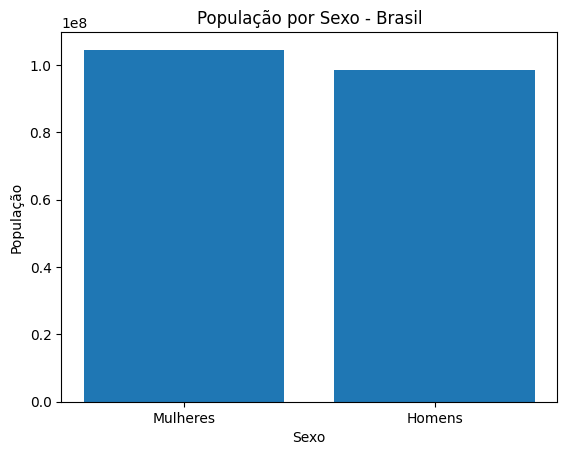

In [9]:
plt.bar(df['Sexo'], df['Populacao'])
plt.title('População por Sexo - Brasil')
plt.xlabel('Sexo')
plt.ylabel('População')
plt.show()


In [10]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Alfabetização - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas vazias
df = df.drop(columns=['Unnamed: 4', 'Unnamed: 5'])

# Renomeia colunas
df.columns = ['Situacao', 'Populacao', 'Percentual', 'Local']

# Exibe a tabela limpa
print(df)


            Situacao  Populacao Percentual   Local
0      Alfabetizados  151547694      93,00  Brasil
1  Não alfabetizados   11403801       7,00  Brasil


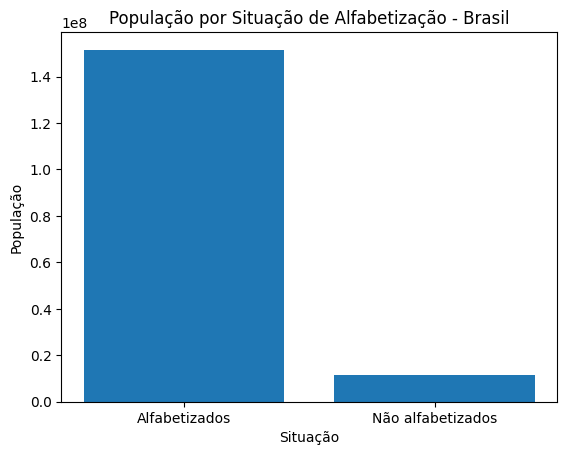

In [11]:
import matplotlib.pyplot as plt

plt.bar(df['Situacao'], df['Populacao'])
plt.title('População por Situação de Alfabetização - Brasil')
plt.xlabel('Situação')
plt.ylabel('População')
plt.show()


In [12]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Características dos domicílios - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['Característica', 'Não possui(%)', 'Possui(%)', 'Recorte Geográfico',
       'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')


In [13]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Características dos domicílios - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove as colunas extras (vazias)
df = df.drop(columns=['Unnamed: 4', 'Unnamed: 5'])

# Renomeia as colunas para facilitar
df.columns = ['Caracteristica', 'Nao_Possui_%', 'Possui_%', 'Local']

# Primeiro, troca a vírgula por ponto para padronizar como número
# Depois, converte o texto corrigido para tipo numérico (float), pra poder gerar gráfico ou fazer contas
df['Possui_%'] = df['Possui_%'].str.replace(',', '.').astype(float)

# Exibe a tabela limpa
print(df)



                        Caracteristica Nao_Possui_%  Possui_%   Local
0          Conectados à rede de esgoto        35,31     64.69  Brasil
1  Abastecidos pela rede geral de água        16,12     83.88  Brasil
2        Têm banheiro de uso exclusivo         1,89     98.11  Brasil
3                   Têm coleta de lixo         8,29     91.71  Brasil


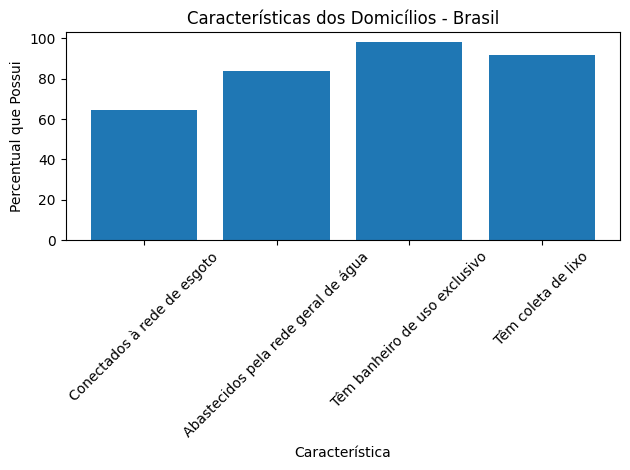

In [14]:
import matplotlib.pyplot as plt

plt.bar(df['Caracteristica'], df['Possui_%'])
plt.title('Características dos Domicílios - Brasil')
plt.xlabel('Característica')
plt.ylabel('Percentual que Possui')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Características do entorno - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['Característica', 'Não possui(%)', 'Possui(%)', 'Recorte Geográfico',
       'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')


In [16]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Características do entorno - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas extras
df = df.drop(columns=['Unnamed: 4', 'Unnamed: 5'])

# Renomeia colunas
df.columns = ['Caracteristica', 'Nao_Possui_%', 'Possui_%', 'Local']

# Converte a coluna 'Possui_%' de texto para número (corrige vírgula para ponto)
df['Possui_%'] = df['Possui_%'].str.replace(',', '.').astype(float)

# Exibe a tabela limpa
print(df)


                   Caracteristica Nao_Possui_%  Possui_%   Local
0                     Arborização        33,44     66.56  Brasil
1                 Via pavimentada        10,70     89.30  Brasil
2  Via sinalizada para bicicletas        97,92      2.08  Brasil
3              Iluminação pública         2,40     97.60  Brasil


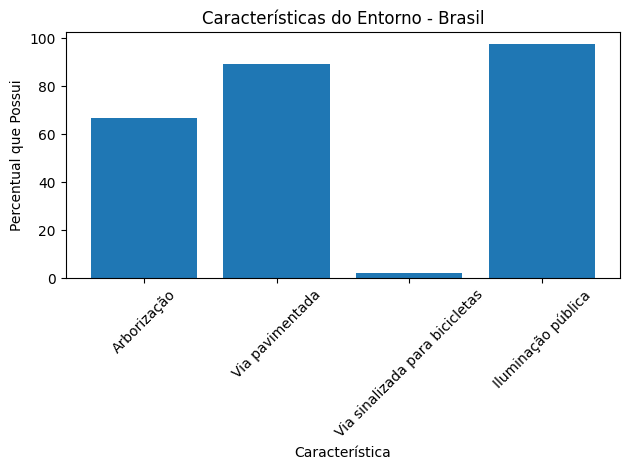

In [17]:
import matplotlib.pyplot as plt

plt.bar(df['Caracteristica'], df['Possui_%'])
plt.title('Características do Entorno - Brasil')
plt.xlabel('Característica')
plt.ylabel('Percentual que Possui')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
# Verifica se todos os valores da coluna 'Possui_%' estão corretos
# (Usado pra identificar o motivo de alguma barra não aparecer no gráfico)
# Se algum valor estiver como string com vírgula ou estiver faltando (NaN), o gráfico não mostra
print(df[['Caracteristica', 'Possui_%']])



                   Caracteristica  Possui_%
0                     Arborização     66.56
1                 Via pavimentada     89.30
2  Via sinalizada para bicicletas      2.08
3              Iluminação pública     97.60


In [19]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Composição domiciliar - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['Composição domiciliar', 'Porcentagem de domicílios',
       'Recorte Geográfico', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [20]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Composição domiciliar - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas extras que estão vazias
df = df.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Renomeia colunas pra facilitar
df.columns = ['Composicao', 'Porcentagem', 'Local']

# Exibe a tabela limpa
print(df)


                              Composicao  Porcentagem   Local
0               domicílios com 1 morador        18.94  Brasil
1  domicílios com cônjuges do mesmo sexo         0.54  Brasil
2     domicílios com cônjuges sem filhos        20.22  Brasil


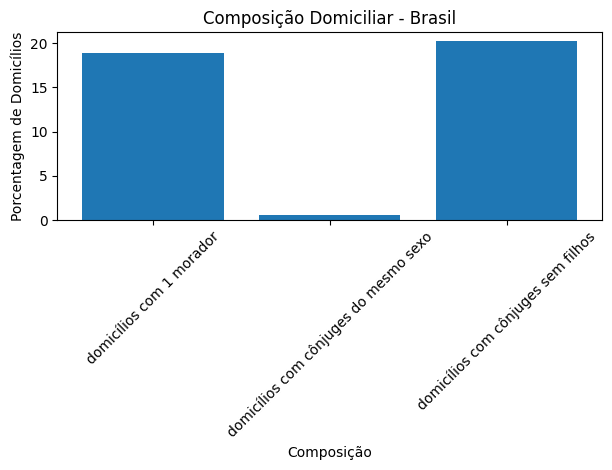

In [21]:
import matplotlib.pyplot as plt

plt.bar(df['Composicao'], df['Porcentagem'])
plt.title('Composição Domiciliar - Brasil')
plt.xlabel('Composição')
plt.ylabel('Porcentagem de Domicílios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Crescimento Populacional - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['Ano da pesquisa', 'População(pessoas)', 'Recorte Geográfico',
       'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [23]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Crescimento Populacional - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas vazias
df = df.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Renomeia colunas
df.columns = ['Ano', 'Populacao', 'Local']

# Exibe a tabela limpa
print(df)


     Ano  Populacao   Local
0   1872    9930478  Brasil
1   1890   14333915  Brasil
2   1900   17438434  Brasil
3   1920   30635605  Brasil
4   1940   41236315  Brasil
5   1950   51944397  Brasil
6   1960   70992343  Brasil
7   1970   94508583  Brasil
8   1980  121150573  Brasil
9   1991  146917459  Brasil
10  2000  169872856  Brasil
11  2010  190755799  Brasil
12  2022  203080756  Brasil


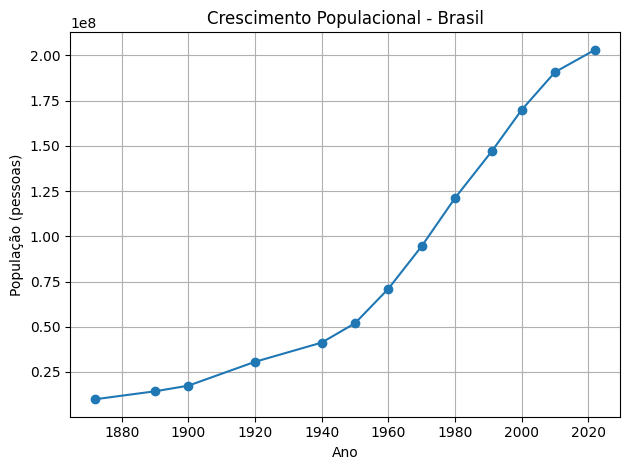

In [24]:
import matplotlib.pyplot as plt

plt.plot(df['Ano'], df['Populacao'], marker='o')
plt.title('Crescimento Populacional - Brasil')
plt.xlabel('Ano')
plt.ylabel('População (pessoas)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Deficiência e autismo - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['Deficiência e autismo', 'Porcentagem de pessoas', 'Recorte Geográfico',
       'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [26]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Deficiência e autismo - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas extras
df = df.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Renomeia colunas
df.columns = ['Condicao', 'Porcentagem', 'Local']

# Converte porcentagem para float (caso esteja com vírgula)
df['Porcentagem'] = df['Porcentagem'].str.replace(',', '.').astype(float)

# Exibe a tabela limpa
print(df)


                     Condicao  Porcentagem   Local
0  Diagnosticados com autismo          1.2  Brasil
1     Pessoas com deficiência          7.3  Brasil


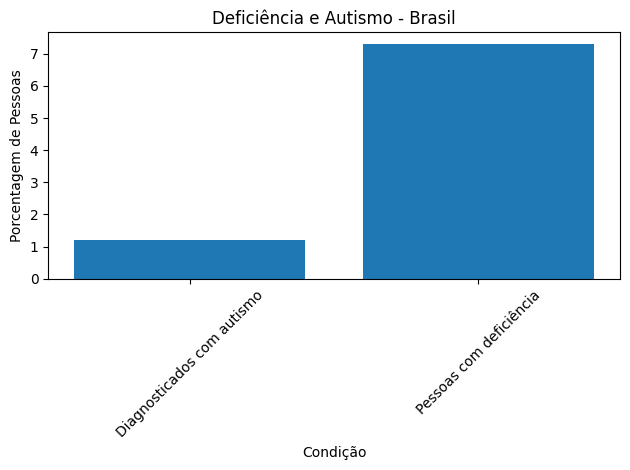

In [27]:
import matplotlib.pyplot as plt

plt.bar(df['Condicao'], df['Porcentagem'])
plt.title('Deficiência e Autismo - Brasil')
plt.xlabel('Condição')
plt.ylabel('Porcentagem de Pessoas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Nível de instrução - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['Nível de instrução', 'População (pessoas)', 'Recorte Geográfico',
       'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [29]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Nível de instrução - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas extras
df = df.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Renomeia colunas
df.columns = ['Nivel', 'Populacao', 'Local']

# Exibe a tabela limpa
print(df)


                                     Nivel  Populacao   Local
0   Sem instrução e fundamental incompleto   49352917  Brasil
1  Fundamental completo e médio incompleto   23796661  Brasil
2     Médio completo e superior incompleto   55305618  Brasil
3                        Superior completo   25854291  Brasil


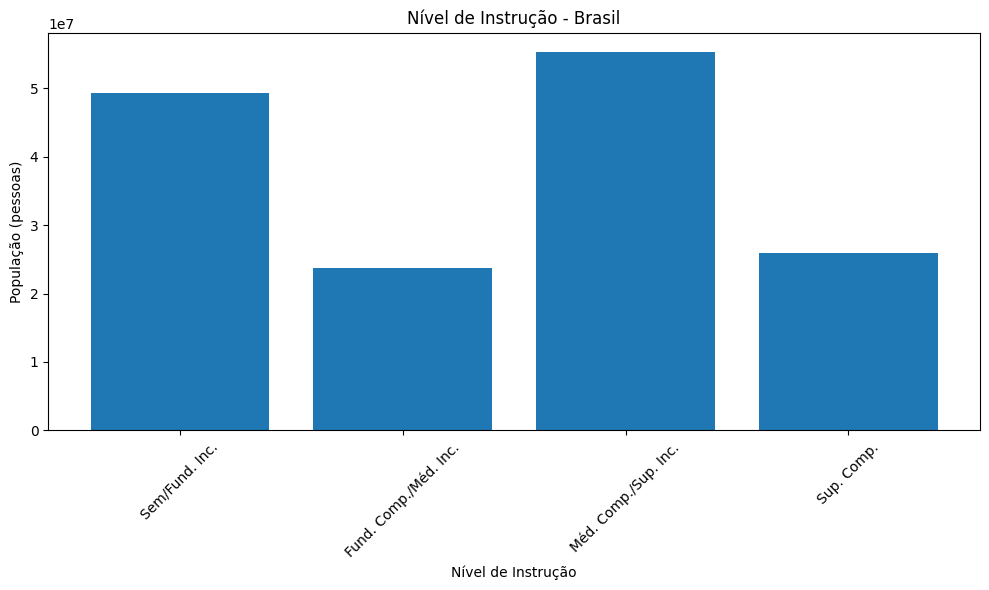

In [30]:
import matplotlib.pyplot as plt

# (opcional) rótulos mais curtos
df['Nivel'] = df['Nivel'].replace({
    'Sem instrução e fundamental incompleto': 'Sem/Fund. Inc.',
    'Fundamental completo e médio incompleto': 'Fund. Comp./Méd. Inc.',
    'Médio completo e superior incompleto': 'Méd. Comp./Sup. Inc.',
    'Superior completo': 'Sup. Comp.'
})

plt.figure(figsize=(10, 6))
plt.bar(df['Nivel'], df['Populacao'])
plt.title('Nível de Instrução - Brasil')
plt.xlabel('Nível de Instrução')
plt.ylabel('População (pessoas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [31]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Pirâmide etária - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['Grupo de idade', 'População feminina(pessoas)',
       'População masculina(pessoas)', 'Recorte Geográfico', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')


In [32]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Pirâmide etária - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas extras
df = df.drop(columns=['Unnamed: 4', 'Unnamed: 5'])

# Renomeia colunas
df.columns = ['FaixaEtaria', 'Feminino', 'Masculino', 'Local']

# Exibe a tabela limpa
print(df)


         FaixaEtaria  Feminino  Masculino  Local
0   100 anos ou mais     27244      10570  Total
1       95 a 99 anos    114859      50319  Total
2       90 a 94 anos    385388     194341  Total
3       85 a 89 anos    835554     493649  Total
4       80 a 84 anos   1465178    1009852  Total
5       75 a 79 anos   2189593    1657786  Total
6       70 a 74 anos   3243186    2615350  Total
7       65 a 69 anos   4288180    3588052  Total
8       60 a 64 anos   5338555    4605834  Total
9       55 a 59 anos   6149601    5419505  Total
10      50 a 54 anos   6584190    6014391  Total
11      45 a 49 anos   7091003    6549109  Total
12      40 a 44 anos   8291111    7781059  Total
13      35 a 39 anos   8345458    7827333  Total
14      30 a 34 anos   7935832    7537285  Total
15      25 a 29 anos   7842265    7627458  Total
16      20 a 24 anos   7699157    7767306  Total
17      15 a 19 anos   7058427    7317515  Total
18      10 a 14 anos   6682215    6992746  Total
19        5 a 9 anos

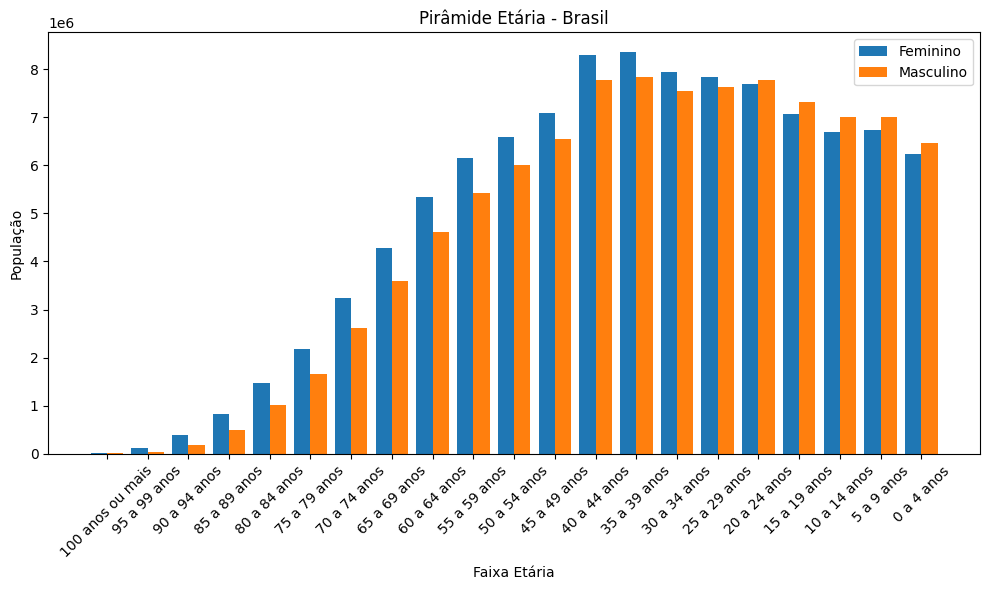

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Define posições para as barras
x = np.arange(len(df['FaixaEtaria']))

plt.figure(figsize=(10, 6))

# Barras lado a lado: feminino e masculino
plt.bar(x - 0.2, df['Feminino'], width=0.4, label='Feminino')
plt.bar(x + 0.2, df['Masculino'], width=0.4, label='Masculino')

plt.title('Pirâmide Etária - Brasil')
plt.xlabel('Faixa Etária')
plt.ylabel('População')
plt.xticks(ticks=x, labels=df['FaixaEtaria'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - População indígena - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['População indígena', 'pessoas', 'Recorte Geográfico', 'Unnamed: 3',
       'Unnamed: 4'],
      dtype='object')


In [35]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - População indígena - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas vazias
df = df.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Renomeia colunas
df.columns = ['Condicao', 'Pessoas', 'Local']

# Exibe a tabela limpa
print(df)


                  Condicao  Pessoas   Local
0                    total  1694836  Brasil
1  se consideram indígenas   467194  Brasil
2  de cor ou raça indígena  1227642  Brasil


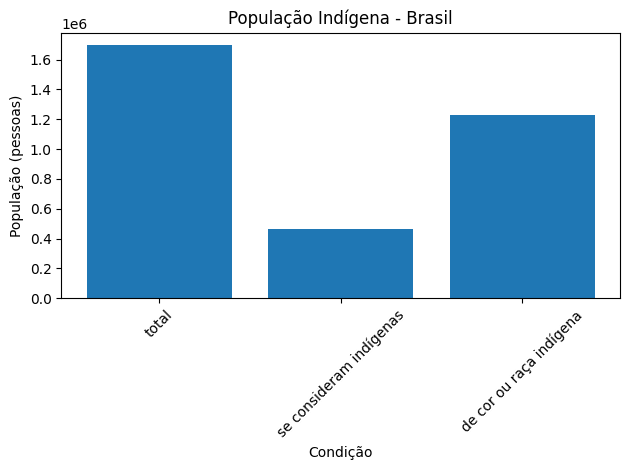

In [36]:
import matplotlib.pyplot as plt

plt.bar(df['Condicao'], df['Pessoas'])
plt.title('População Indígena - Brasil')
plt.xlabel('Condição')
plt.ylabel('População (pessoas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - População por cor ou raça - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['Cor ou raça', 'População (pessoas)', 'Recorte Geográfico',
       'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [38]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - População por cor ou raça - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas vazias
df = df.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Renomeia colunas
df.columns = ['CorRaca', 'Populacao', 'Local']

# Exibe a tabela limpa
print(df)


    CorRaca  Populacao   Local
0    Branca   88252121  Brasil
1     Preta   20656458  Brasil
2   Amarela     850130  Brasil
3     Parda   92083286  Brasil
4  Indígena    1227642  Brasil


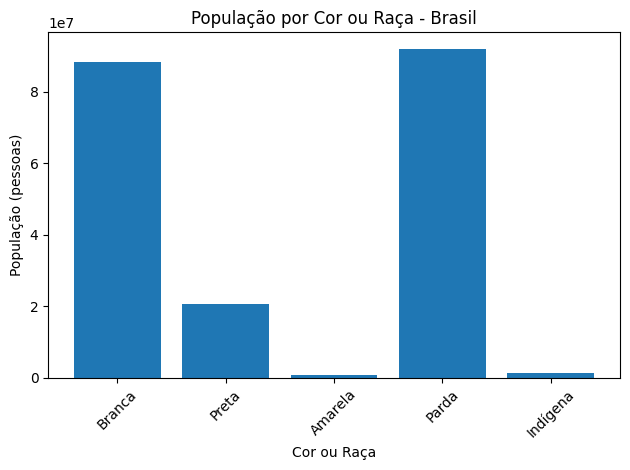

In [39]:
import matplotlib.pyplot as plt

plt.bar(df['CorRaca'], df['Populacao'])
plt.title('População por Cor ou Raça - Brasil')
plt.xlabel('Cor ou Raça')
plt.ylabel('População (pessoas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - População por situação do domicílio - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['Situação', 'População (pessoas)', 'Percentual', 'Recorte Geográfico',
       'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')


In [41]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - População por situação do domicílio - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas extras
df = df.drop(columns=['Unnamed: 4', 'Unnamed: 5'])

# Renomeia colunas
df.columns = ['Situacao', 'Populacao', 'Percentual', 'Local']

# Converte população e percentual para número
df['Percentual'] = df['Percentual'].str.replace(',', '.').astype(float)

# Exibe a tabela limpa
print(df)


  Situacao  Populacao  Percentual   Local
0   Urbana  177508417       87.41  Brasil
1    Rural   25572339       12.59  Brasil


In [42]:
ordem = ['Urbana', 'Rural']
df['Situacao'] = pd.Categorical(df['Situacao'], categories=ordem, ordered=True)
df = df.sort_values('Situacao')
# (Opcional) Corrige a ordem visual no gráfico: define a ordem correta e força o pandas a respeitar

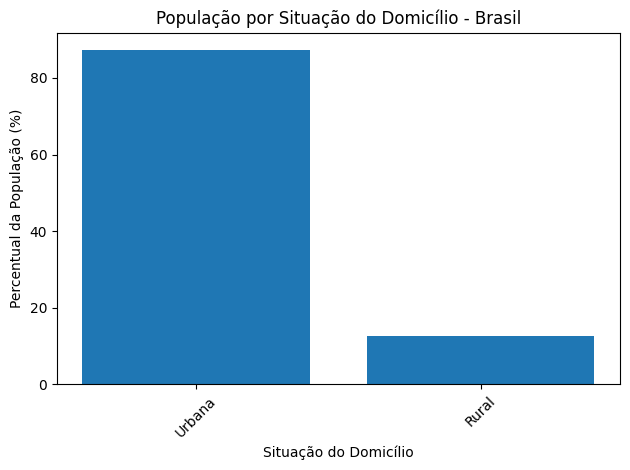

In [43]:
import matplotlib.pyplot as plt

plt.bar(df['Situacao'], df['Percentual'])
plt.title('População por Situação do Domicílio - Brasil')
plt.xlabel('Situação do Domicílio')
plt.ylabel('Percentual da População (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - População quilombola - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['População quilombola (pessoas)', 'Recorte Geográfico', 'Unnamed: 2',
       'Unnamed: 3'],
      dtype='object')


In [45]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - População quilombola - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas vazias
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3'])

# Renomeia colunas
df.columns = ['Populacao', 'Local']

# Exibe a tabela limpa
print(df)


   Populacao   Local
0    1330186  Brasil


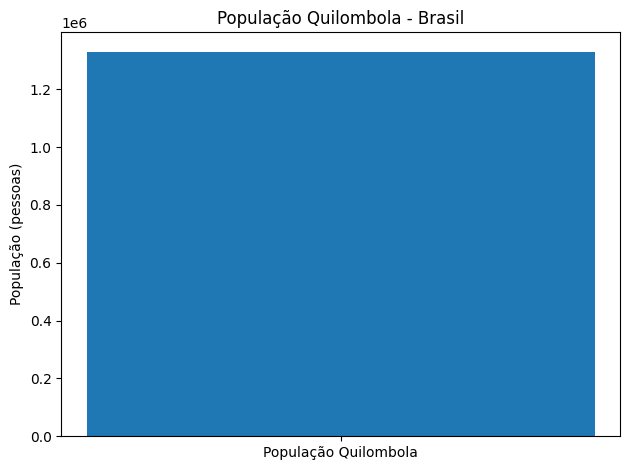

In [46]:
import matplotlib.pyplot as plt

plt.bar(['População Quilombola'], [df['Populacao'].sum()])
plt.title('População Quilombola - Brasil')
plt.ylabel('População (pessoas)')
plt.tight_layout()
plt.show()


In [47]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - População residente em favelas - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['Situação', 'População(pessoas)', 'Percentual', 'Recorte Geográfico',
       'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')


In [48]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - População residente em favelas - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas extras vazias
df = df.drop(columns=['Unnamed: 4', 'Unnamed: 5'])

# Renomeia colunas
df.columns = ['Situacao', 'Populacao', 'Percentual', 'Local']

# Converte colunas numéricas
df['Percentual'] = df['Percentual'].str.replace(',', '.').astype(float)

# Exibe a tabela limpa
print(df)


          Situacao  Populacao  Percentual   Local
0  Fora de favelas  186689966       91.93  Brasil
1       Em favelas   16390790        8.07  Brasil


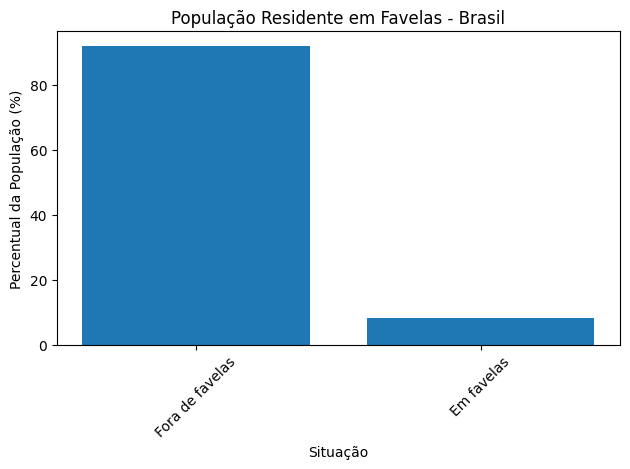

In [49]:
import matplotlib.pyplot as plt

plt.bar(df['Situacao'], df['Percentual'])
plt.title('População Residente em Favelas - Brasil')
plt.xlabel('Situação')
plt.ylabel('Percentual da População (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Território - Brasil.csv', sep=';', encoding='utf-8-sig')
print(df.columns)


Index(['Ano da pesquisa', 'Área(km²)', 'Densidade demográfica(hab/km²)',
       'Recorte Geográfico', 'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')


In [51]:
# Leitura do CSV
df = pd.read_csv('/content/dados_do_ibge/Censo 2022 - Território - Brasil.csv', sep=';', encoding='utf-8-sig')

# Remove colunas extras
df = df.drop(columns=['Unnamed: 4', 'Unnamed: 5'])

# Renomeia colunas
df.columns = ['Ano', 'Area_km2', 'Densidade', 'Local']

# Exibe a tabela limpa
print(df)


    Ano    Area_km2  Densidade   Local
0  2022  8510417.77      23.86  Brasil


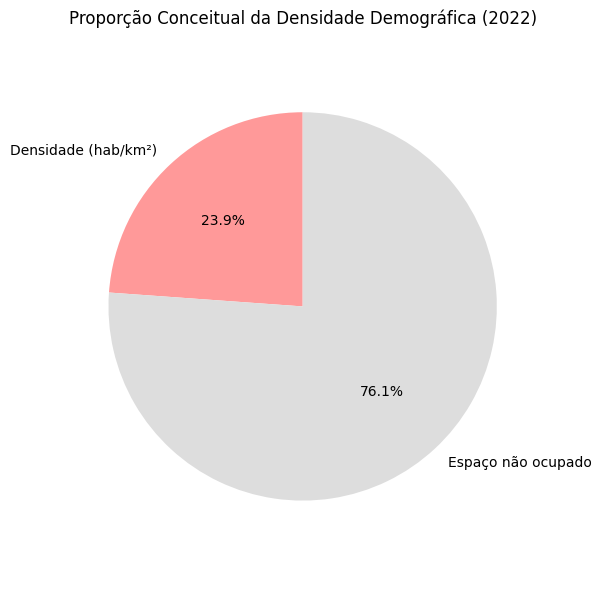

In [52]:
# Supondo que você já tem o DataFrame df carregado com os valores
densidade = df['Densidade'].values[0]
restante = 100 - densidade  # apenas ilustrativo, o "vazio" do território

labels = ['Densidade (hab/km²)', 'Espaço não ocupado']
valores = [densidade, restante]

colors = ['#ff9999', '#dddddd']

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proporção Conceitual da Densidade Demográfica (2022)')
plt.axis('equal')  # garante que a pizza fique redonda
plt.tight_layout()
plt.show()

